In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [85]:
import kid_readout.analysis.process_mmw_response
reload(kid_readout.analysis.process_mmw_response)

<module 'kid_readout.analysis.process_mmw_response' from '/home/gjones/kid_readout/kid_readout/analysis/process_mmw_response.py'>

In [3]:
import glob

In [4]:
fns = glob.glob('/data/readout/2015-10-[12]*.nc')

In [5]:
fns

['/data/readout/2015-10-19_212043_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
 '/data/readout/2015-10-19_215830_mmw_frequency_sweep_hittite_level_-1.000_dBm.nc',
 '/data/readout/2015-10-20_143308_mmw_frequency_sweep_hittite_level_-1.000_dBm.nc',
 '/data/readout/2015-10-20_151140_mmw_frequency_sweep_hittite_level_-1.000_dBm.nc',
 '/data/readout/2015-10-20_152744_mmw_frequency_sweep_hittite_level_-1.000_dBm.nc',
 '/data/readout/2015-10-21_110609_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
 '/data/readout/2015-10-21_114142_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
 '/data/readout/2015-10-21_122856_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
 '/data/readout/2015-10-21_130422_mmw_frequency_sweep_hittite_level_0.000_dBm.nc']

In [6]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse(fn,0,data_is_aligned=False) for fn in fns]

/home/gjones/kid_readout/kid_readout/analysis/resonator.py:83: UserWarning: warning: inverse not yet defined for bifurcation model, proceeding anyway
  warnings.warn("warning: inverse not yet defined for bifurcation model, proceeding anyway")


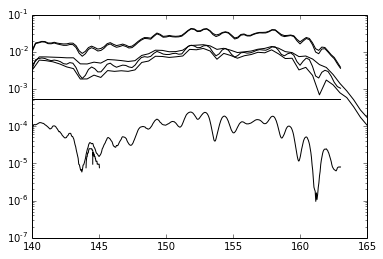

In [35]:
for mmw in mmws:
    semilogy(mmw.mmw_freq/1e9,mmw.zbd_voltage,color='k')


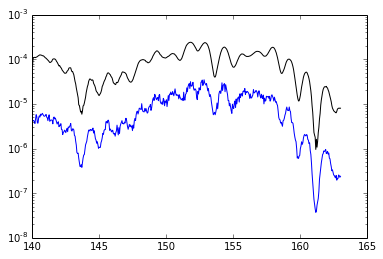

In [27]:
for mmw in mmws[4:5]:
    semilogy(mmw.mmw_freq/1e9,mmw.mmw_frac_response)
    semilogy(mmw.mmw_freq/1e9,mmw.zbd_voltage,color='k')
#xlim(144,145)
#ylim(1e-6,1e-5)

In [33]:
mmw0 = kid_readout.analysis.process_mmw_response.MmwResponse('/data/readout/2015-04-23_115903_mmw_frequency_sweep.nc',3)

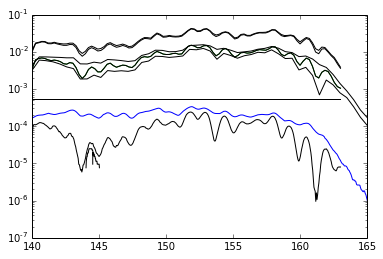

In [37]:
#semilogy(mmw0.mmw_freq/1e9,mmw0.mmw_frac_response)
#semilogy(mmw.mmw_freq/1e9,mmw.mmw_frac_response)
semilogy(mmw0.mmw_freq/1e9,mmw0.zbd_voltage)
semilogy(mmw.mmw_freq/1e9,mmw.zbd_voltage)
for mmw in mmws:
    semilogy(mmw.mmw_freq/1e9,mmw.zbd_voltage,color='k')

In [46]:
sweep_files = glob.glob('/data/readout/*mmw.nc')

In [47]:
len(sweep_files)

89

In [86]:
mmws = []
for sweep_file in sweep_files+fns:
    try:
        mmw=kid_readout.analysis.process_mmw_response.MmwResponse(sweep_file,0,data_is_aligned=False)
        if mmw.aligned_data.shape[0] > 2:
            mmws.append(mmw)
    except Exception,e:
        print "failed for",sweep_file,e

this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear to be a valid mmw sweep file
this doesn't appear 

(1e-07, 0.0001)

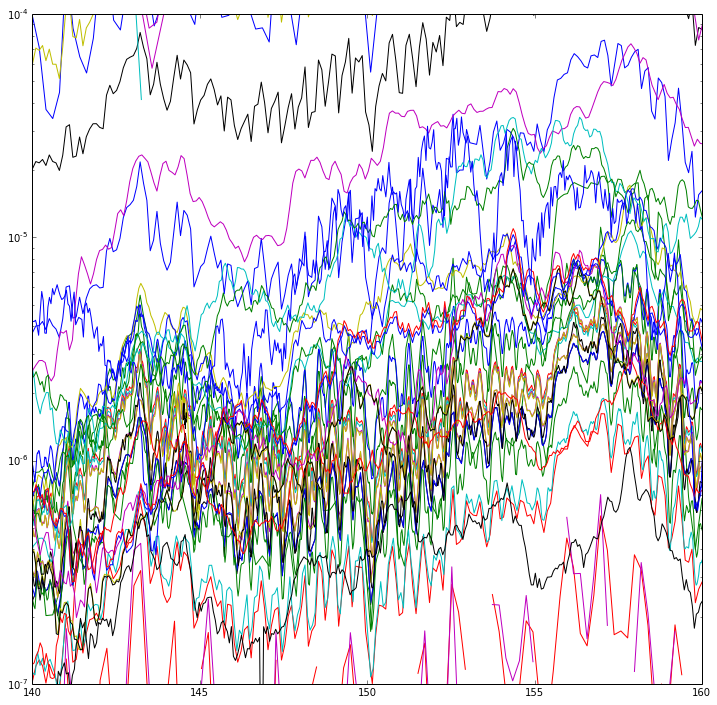

In [97]:
figure(figsize=(12,12))
for mmw in mmws:
    try:
        semilogy(mmw.mmw_freq/1e9,mmw.mmw_frac_response)
    except:
        pass
xlim(140,160)
#yscale('linear')
ylim(1e-7,1e-4)

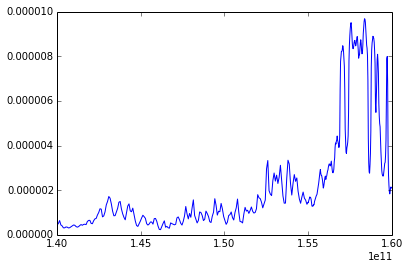

In [57]:
plot(mmw0.mmw_freq,mmw0.mmw_frac_response)

In [87]:
len(mmws)

47

In [75]:
import os

In [79]:
mmw=mmws[25]

In [80]:
mmw.aligned_data.shape

(1, 625)

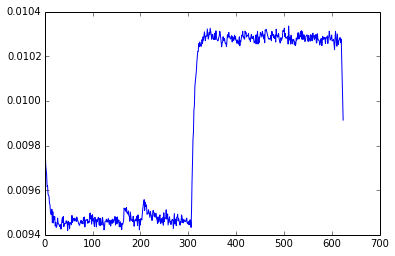

In [82]:
plot(mmw.aligned_data.T)

In [83]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF(sweep_files[25])

In [84]:
rnc.timestream_20140915120717.data.shape

(16, 131072)

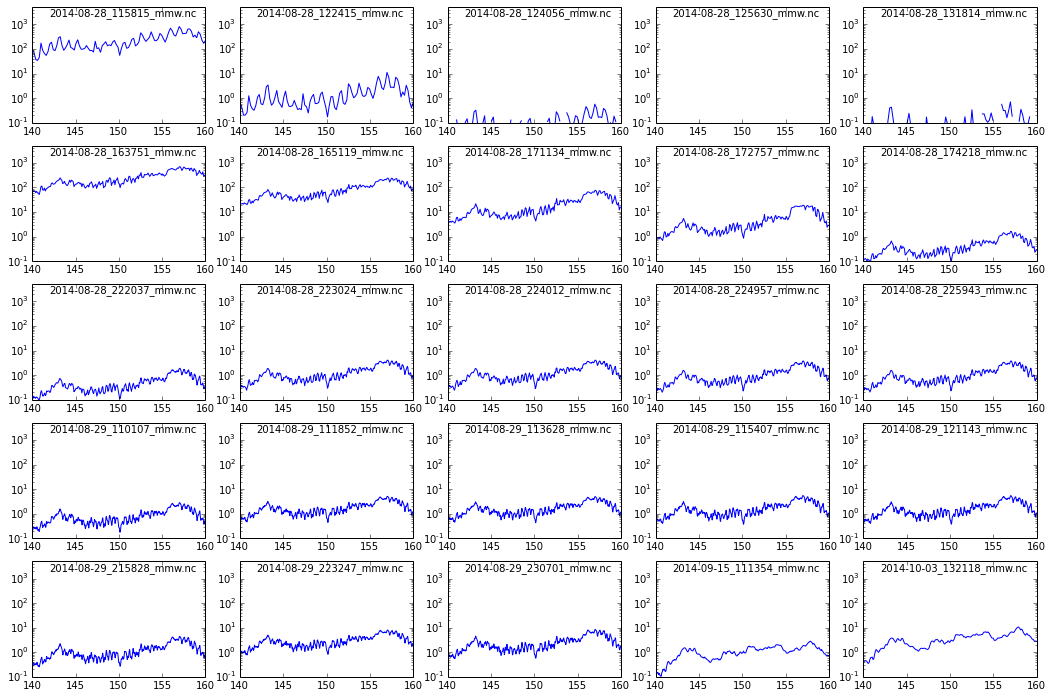

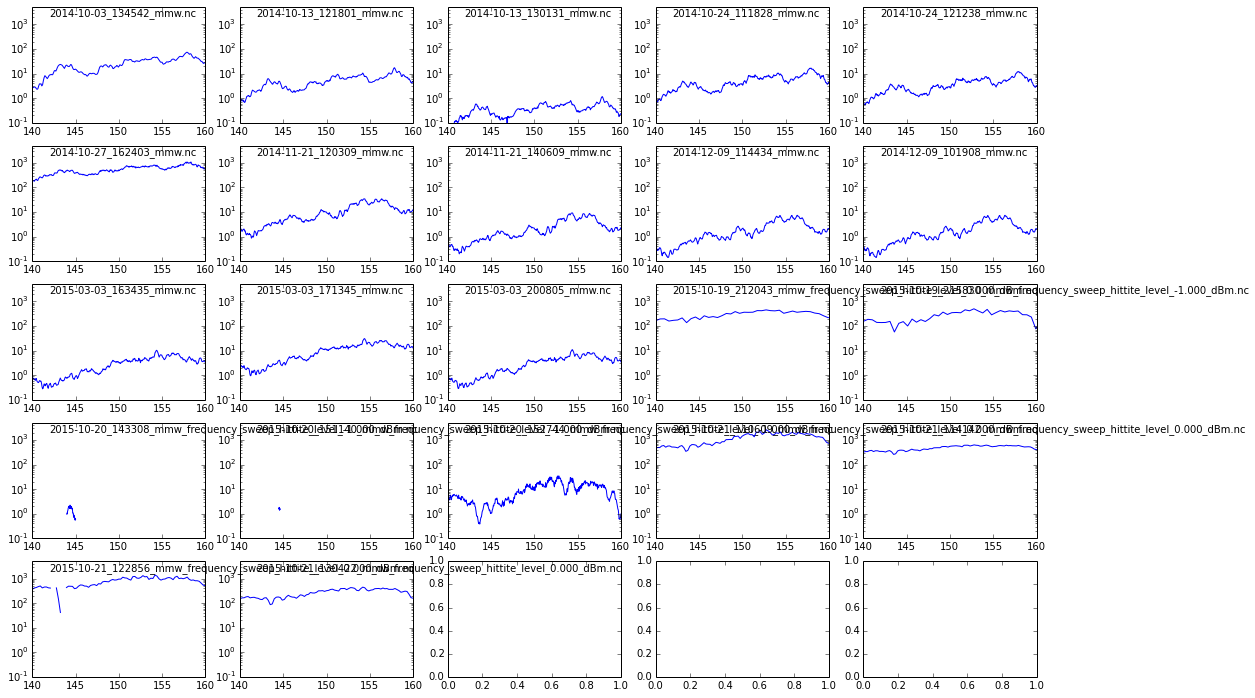

In [91]:
for k in range(2):
    fig,axs=subplots(5,5,figsize=(18,12))
    for m in range(25):
        index = k*25+m
        if index < len(mmws):
            ax = axs.flatten()[m]
            mmw = mmws[index]
            ax.semilogy(mmw.mmw_freq/1e9,mmw.mmw_frac_response*1e6)
            ax.text(0.1,0.99,os.path.split(mmw.filename)[1],va='top',transform=ax.transAxes)
            ax.set_xlim(140,160)
            ax.set_ylim(1e-1,5e3)